In [13]:
import numpy as np
import pandas as pd
import os
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns # seaborn ref : https://greeksharifa.github.io/machine_learning/2019/12/05/Seaborn-Module/
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm;
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
df = pd.read_csv("2018_sel_KNN.csv") ## 파일리딩!
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           7992 non-null   int64  
 1   age           7992 non-null   int64  
 2   incm5         7992 non-null   int64  
 3   edu           7992 non-null   int64  
 4   occp          7992 non-null   int64  
 5   wt_hs         7992 non-null   float64
 6   wt_vt         7992 non-null   float64
 7   wt_ntr        7992 non-null   float64
 8   cfam          7992 non-null   int64  
 9   DE1_pr        7992 non-null   int64  
 10  D_1_1         7992 non-null   int64  
 11  DI2_pr        7992 non-null   int64  
 12  DH4_pr        7992 non-null   int64  
 13  DH2_pr        7992 non-null   int64  
 14  DN1_pr        7992 non-null   int64  
 15  DJ0_pr        7992 non-null   int64  
 16  DKNaN_pr      7992 non-null   int64  
 17  MH1_yr        7992 non-null   int64  
 18  Total_slp_wk  7992 non-null 

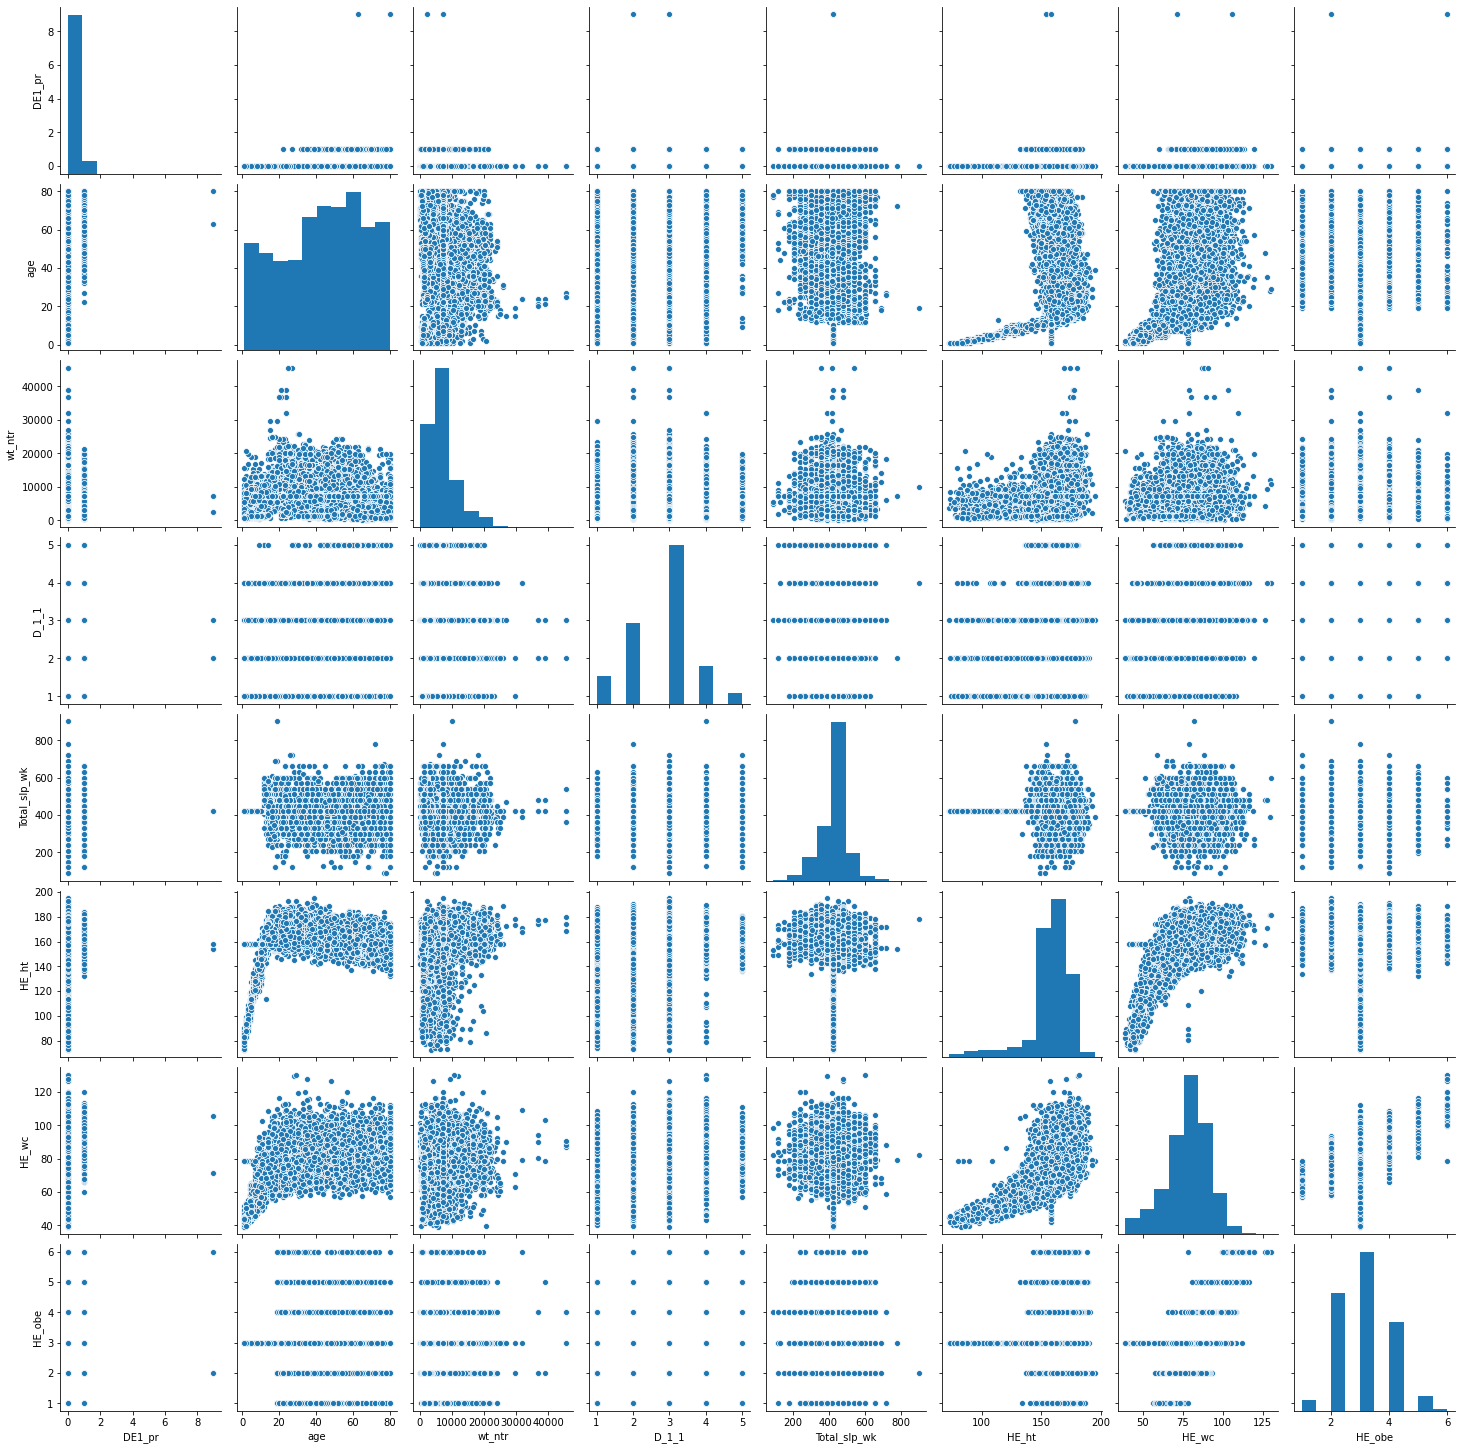

In [4]:
sns.pairplot(df[['DE1_pr','age', 'wt_ntr','D_1_1','Total_slp_wk','HE_ht','HE_wc','HE_obe']])

In [10]:
df['intercept'] = 1
lm = sm.OLS(df['DE1_pr'], df)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DE1_pr   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.774e+17
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:46:02   Log-Likelihood:             1.4082e+05
No. Observations:                7992   AIC:                        -2.816e+05
Df Residuals:                    7950   BIC:                        -2.813e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sex            2.76e-14   1.45e-10      0.000      1.000   -2.85e-10    2.85e-10
age           1.972e-15   4.79e-12      0.000      1.000   -9.39e-12     9.4e-12
incm5        -1.548e-14   7.72e-11     -0.000      1.000   -1.51e-10    1.51e-10
edu          -1.028e-14   7.16e-11     -0.000      1.000    -1.4e-10     1.4e-10
occp         -7.205e-15   3.35e-11     -0.000      1.000   -6.56e-11    6.56e-11
wt_hs        -4.117e-18   3.34e-14     -0.000      1.000   -6.55e-14    6.55e-14
wt_vt         3.599e-19   9.12e-15   3.95e-05      1.000   -1.79e-14    1.79e-14
wt_ntr       -4.085e-18   1.85e-14     -0.000      1.000   -3.62e-14    3.62e-14
cfam          -5.36e-15   6.35e-11  -8.45e-05      1.000   -1.24e-10    1.24e-10
DE1_pr           1.0000    2.2e-10   4.54e+09      0.000       1.000       1.000
D_1_1         5.744e-14   7.65e-11      0.001      0.999    -1.5e-10     1.5e-10
DI2_pr        2.706e-16   2.02e-10   1.34e-06      1.000   -3.97e-10    3.97e-10
DH4_pr         2.98e-13   8.22e-10      0.000      1.000   -1.61e-09    1.61e-09
DH2_pr        2.181e-13   3.03e-10      0.001      0.999   -5.93e-10    5.94e-10
DN1_pr       -1.049e-12    1.4e-09     -0.001      0.999   -2.75e-09    2.75e-09
DJ0_pr        1.323e-14   2.18e-10   6.07e-05      1.000   -4.27e-10    4.27e-10
DKNaN_pr      1.574e-14   2.89e-09   5.45e-06      1.000   -5.66e-09    5.66e-09
MH1_yr       -3.372e-14    2.1e-10     -0.000      1.000   -4.12e-10    4.12e-10
Total_slp_wk    2.7e-16   8.49e-13      0.000      1.000   -1.66e-12    1.66e-12
HE_ht         -4.77e-16   6.15e-12  -7.76e-05      1.000   -1.21e-11    1.21e-11
HE_wc         -2.56e-15   1.51e-11     -0.000      1.000   -2.97e-11    2.97e-11
HE_BMI        3.982e-15   4.53e-11   8.79e-05      1.000   -8.88e-11    8.88e-11
HE_obe       -1.526e-15   1.25e-10  -1.23e-05      1.000   -2.44e-10    2.44e-10
HE_usg        1.565e-14   1.01e-08   1.55e-06      1.000   -1.98e-08    1.98e-08
HE_hcv       -9.528e-16   8.61e-11  -1.11e-05      1.000   -1.69e-10    1.69e-10
N_WAT_C      -3.314e-16   2.25e-11  -1.47e-05      1.000   -4.42e-11    4.42e-11
N_INTK       -3.877e-17   2.23e-13     -0.000      1.000   -4.38e-13    4.38e-13
N_CHOL        1.997e-17   4.29e-13   4.66e-05      1.000    -8.4e-13     8.4e-13
N_SUGAR       5.324e-16   2.31e-12      0.000      1.000   -4.54e-12    4.54e-12
N_CA          5.507e-18   2.72e-13   2.02e-05      1.000   -5.34e-13    5.34e-13
N_VA         -3.638e-12      0.000  -8.35e-09      1.000      -0.001       0.001
N_VITC        8.755e-17   9.76e-13   8.97e-05      1.000   -1.91e-12    1.91e-12
ainc          2.003e-16   3.84e-13      0.001      1.000   -7.52e-13    7.53e-13
N_MUFA            5e-16   7.94e-12    6.3e-05      1.000   -1.56e-11    1.56e-11
N_WATER       1.967e-17   2.74e-13   7.17e-05      1.000   -5.38e-13    5.38e-13
N_PUF

In [17]:
y, X = dmatrices('DE1_pr ~ age + wt_ntr + D_1_1 + Total_slp_wk + HE_ht + HE_wc + HE_obe' , df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,138.538978,Intercept
1,2.089803,age
2,1.132072,wt_ntr
3,1.207993,D_1_1
4,1.004500,Total_slp_wk
5,2.684593,HE_ht
6,5.645058,HE_wc
7,2.480374,HE_obe
